<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Eigensystem of covariance matrix
- Fitting lines and planes

<hr/>

<h1><font color="darkblue">Recap from last time</font></h1>

### Eigendecomposition 

> $ C = E\,\Lambda\,E^T$ and $E^T C\,E = \Lambda$ since $E^T E=I$
><br/><br/>
> or
><br/><br/>
>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) 
= \sum_{k=1}^N\ \lambda_k P_k $

### Scree Plot

- The eigenvalue spectrum

>$ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$

- How many important directions?

> Keep $K =\,?$ principal components

- Explained variance of components 

> Cf. $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]+\mathbb{Var}[Y]$ if uncorrelated

#### Generate data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)

In [2]:
import scipy
import pandas as pd

In [3]:
# generate 10-D vectors: scale, rotate
np.random.seed(1)

Z = scipy.stats.norm(0,1).rvs(size=(10,1000))

if True: # scale them here
    for i in range(Z.shape[0]): 
        Z[i,:] *= np.sqrt(i)
    Z[:4,:] *= 1e-7
    
# quick-n-dirty random rotation
M = np.random.randn(Z.shape[0], Z.shape[0])
Q,_ = np.linalg.qr(M) # QR decomposition
Y = Q @ Z # random rotation
print (Y.shape)

np.savetxt("temp.csv", Y.T, delimiter=",")

(10, 1000)


In [4]:
# remove all previous variables from memory
del Y, M, Q, Z

In [5]:
try:
    print (f'Shape of Y is {Y.shape}')
except NameError as e:
    print (f'Error message: {e}')    

Error message: name 'Y' is not defined


#### Analyze data

Now your data file is available here: [temp.csv](temp.csv)

In [6]:
# pandas dataframe - table data structure
pd.read_csv('temp.csv', header=None)

,0,1,2,3,4,5,6,7,8,9
0,-1.505335,2.453394,-4.075387,0.506457,2.099745,-6.931051,-0.168452,-0.310699,-0.018441,-4.934232
1,0.494729,2.499596,1.114845,0.424238,-1.877948,-1.296794,-1.740021,2.978778,-1.480376,-0.246117
2,-0.892449,-2.503452,-0.374558,3.173975,1.820951,2.757170,-0.067205,-4.549206,1.550991,0.084282
3,4.573884,-1.473756,0.092427,-0.892612,1.798937,-3.317332,-0.401666,-0.773584,3.035257,-2.862596
4,2.326699,-0.498571,2.425490,2.492707,0.310059,2.292305,-2.231741,-1.538372,0.458125,0.288181
...,...,...,...,...,...,...,...,...,...,...
995,-2.020337,1.170304,1.846340,-0.433384,0.404820,1.667256,2.354281,-2.522590,2.129207,0.425369
996,-1.671802,1.577545,-1.394554,1.770647,1.193426,-2.532625,-0.166589,-1.607007,0.631044,-2.545618
997,0.681214,-2.206434,-1.423636,-0.001810,3.133706,1.023850,0.376176,-3.534157,0.281663,-0.366143
998,0.258981,-0.557299,0.319770,1.824078,-0.925941,-1.014381,-0.382192,0.005945,2.068411,-1.040467


In [7]:
# re-load the Y matrix and convert dataframe to matrix
Y = pd.read_csv('temp.csv',header=None).values.T
Y.shape

(10, 1000)

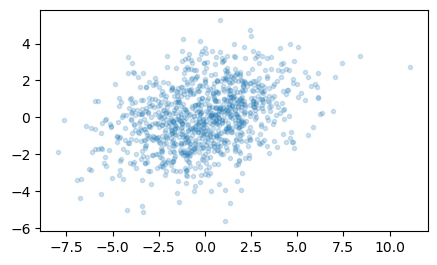

In [8]:
plt.subplot(1,1,1).set_aspect('equal')
plt.plot(Y[0,:], Y[2,:], '.', alpha=0.2);

In [9]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=Y.shape[0], whiten=False)
pca.fit(Y.T)

print(f'''Eigenvalues of Cov as calculated by PCA: 
{pca.explained_variance_}''') 

B = pca.transform(Y.T).T
B[:2,:4]

Eigenvalues of Cov as calculated by PCA: 
[9.15229681e+00 7.95568137e+00 6.99119215e+00 5.79201733e+00
 4.80041913e+00 4.05751984e+00 3.05438862e-14 1.86810821e-14
 1.05299519e-14 2.29338739e-31]


array([[-3.6946082 , -2.65830536,  3.41084971, -5.66224603],
       [ 5.47313599,  3.39172957, -3.86412925, -2.81314035]])

In [10]:
# singular value decomposition of data matrix returns U,W,V
Y -= Y.mean(axis=1, keepdims=True)
U, W, _ = np.linalg.svd(Y)

print(f'''Eigenvalues of Cov as calculated by SVD: 
{np.square(W) / (Y.shape[1] - 1)}''') 

B = U.T @ Y
B[:2,:4]

Eigenvalues of Cov as calculated by SVD: 
[9.15229681e+00 7.95568137e+00 6.99119215e+00 5.79201733e+00
 4.80041913e+00 4.05751984e+00 3.05438862e-14 1.86810821e-14
 1.05299519e-14 2.29338739e-31]


array([[-3.6946082 , -2.65830536,  3.41084971, -5.66224603],
       [-5.47313599, -3.39172957,  3.86412925,  2.81314035]])

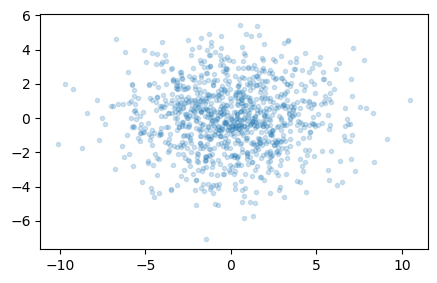

In [11]:
plt.subplot(1,1,1).set_aspect('equal')
plt.plot(B[0,:], B[5,:], '.', alpha=0.2);

In [12]:
E, L = pca.components_.T, pca.explained_variance_

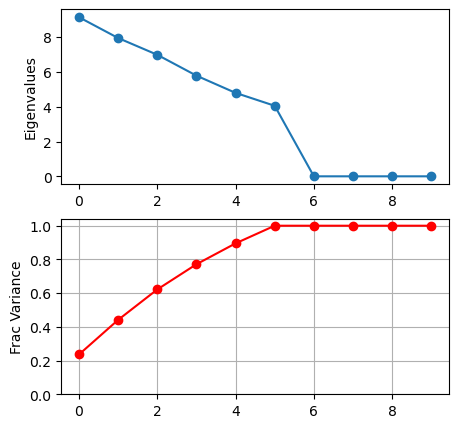

In [13]:
plt.subplot(2,1,1); plt.plot(L,'o-'); plt.ylabel('Eigenvalues')
plt.subplot(2,1,2); cl=np.cumsum(L); plt.ylabel('Frac Variance')
plt.plot(cl/cl[-1],'o-r'); plt.ylim(0,None); plt.grid()

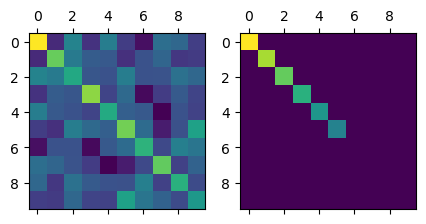

In [14]:
# plot orig and new covariance matrices (estimate w/o norm)
ax=plt.subplot(1,2,1); ax.matshow(Y @ Y.T) 
ax=plt.subplot(1,2,2); ax.matshow(B @ B.T);

In [15]:
np.diag(B @ B.T / (B.shape[1] - 1))

array([9.15229681e+00, 7.95568137e+00, 6.99119215e+00, 5.79201733e+00,
       4.80041913e+00, 4.05751984e+00, 3.05438862e-14, 1.86810821e-14,
       1.05299519e-14, 1.11462673e-30])

In [16]:
pca.explained_variance_

array([9.15229681e+00, 7.95568137e+00, 6.99119215e+00, 5.79201733e+00,
       4.80041913e+00, 4.05751984e+00, 3.05438862e-14, 1.86810821e-14,
       1.05299519e-14, 2.29338739e-31])

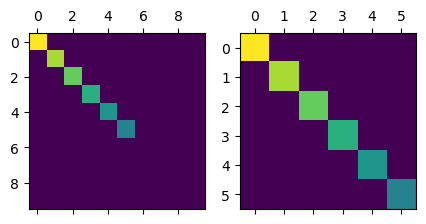

In [17]:
A = B[:6,:]
# plot new covariance matrices with and without truncation
ax=plt.subplot(1,2,1); ax.matshow(B @ B.T)
ax=plt.subplot(1,2,2); ax.matshow(A @ A.T);

### Inverse of the Covariance Matrix

- Appears in the multivariate normal distribution!

>$\displaystyle{\cal{}N}(x;\mu,C) = \frac{1}{\sqrt{\det(2\pi{}C)}}\ \exp\left[-\frac{1}{2}(x\!-\!\mu)^T\,C^{-1} (x\!-\!\mu)\right]$

- Inverse of the diagonal eigenvalue matrix

>$\displaystyle \Lambda^{-1} =  \left( \begin{array}{ccc}
\frac{1}{\lambda_1} &  & \cdots & 0\\
 & \frac{1}{\lambda_2} &   & \vdots\\
\vdots &  & \ddots &  \\
0 & \cdots &  & \frac{1}{\lambda_N} \\
\end{array} \right)$

- Inverse of the covariance matrix

>$\displaystyle C^{-1} = E\ \Lambda^{-1} E^T$

- Also see pseudoinverse with small eigenvalues 

### Fitting Lines

- What if $x$ and $y$ are both noisy? 

> For example, $\big\{(x_i,y_i)\big\}$ measurements have the same uncertainties. 
> The relevant residuals are perpendicular to the line.
> Minimizing RMS of residuals is related to maximizing the sample variance along line!

- Sounds like the PCA problem?


### Fitting Planes

- Similarly, fitting a $K$-dimensional hyperplane in $N$ dimensions, i.e., looking for the $a$ normal vector to minimize residuals on set of centered $\{x_i\}$ vectors

> Minimizing sum of square lengths of the residual vectors
><br/><br/>
>$\displaystyle \qquad \min_a \sum_i r_i^T r_i \ \ \ \ \ $  where $\ \ \ r_i = x_i - \left(a\,a^T\right)x_i$
><br/><br/>
> yields 
><br/><br/>
>$\displaystyle \qquad \min_a \ \left[\textrm{const} - \sum_i a^T\!\!\left(x_i x_i^T\right) a\right]$
><br/>
or
><br/>
>$\displaystyle \qquad \max_a \ a^T\!\left(\sum_i x_i x_i^T\right)\, a $ 
><br/><br/>
> cf. sample variance along $a$, if data already centered

- Essentially same as the PCA problem!

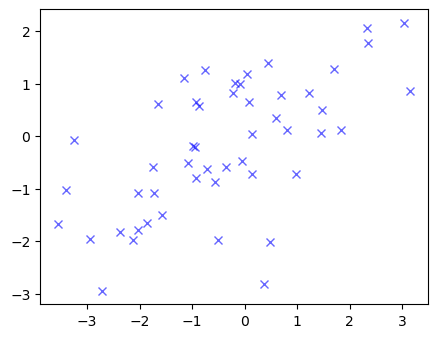

In [18]:
# generate 2D (column) vectors
np.random.seed(seed=42);
N = scipy.stats.norm(0,1).rvs((2,50)); 
N[0,:] *= 2 
f = np.pi / 6   # rotate by 30 deg
R = np.array([[np.cos(f), -np.sin(f)],
              [np.sin(f),  np.cos(f)]]) 
X = R @ N

plt.subplot(1,1,1).set_aspect('equal')
plt.plot(X[0,:], X[1,:], 'xb', alpha=0.6);

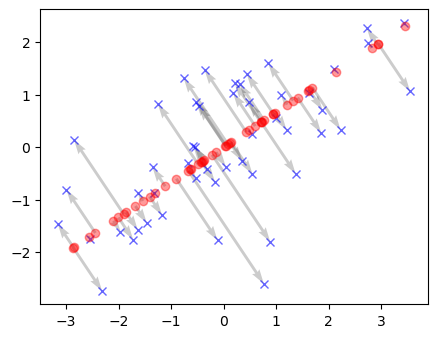

In [19]:
# project on 1st pricipal component
X -= X.mean(axis=1, keepdims=True) 
E,_,_ = np.linalg.svd(X) # only the eigenvectors
F = E[:,:1]       # truncated basis: only PC1
P = F @ F.T @ X   # projection
R = X - P         # residuals 

plt.subplot(1,1,1).set_aspect('equal')
plt.plot(X[0,:],X[1,:], 'xb', alpha=0.6)
plt.plot(P[0,:],P[1,:], 'or', alpha=0.4)
plt.quiver(P[0,:],P[1,:], R[0,:],R[1,:], alpha=0.2,
    angles='xy', scale_units='xy', scale=1);

### More on Fitting Later

- Next: Bayesian inference